In [6]:
# Thuật toán Value Iteration cơ bản
import numpy as np
import matplotlib.pyplot as plt

class ValueIteration:
    def __init__(self, grid_size=5, gamma=0.9, theta=1e-6):
        self.grid_size = grid_size
        self.gamma = gamma
        self.theta = theta
        self.goal_state = (4, 4)
        self.V = np.zeros((grid_size, grid_size))
    
    def take_action(self, state, action):
        row, col = state
        
        # If already at goal state, stay there (terminal state)
        if state == self.goal_state:
            return state, 0
        
        if action == 0:  # up
            row = max(row - 1, 0)
        elif action == 1:  # down
            row = min(row + 1, self.grid_size - 1)
        elif action == 2:  # left
            col = max(col - 1, 0)
        elif action == 3:  # right
            col = min(col + 1, self.grid_size - 1)

        new_state = (row, col)
        if new_state == self.goal_state:
            reward = 100
        else:
            reward = -1
        return new_state, reward
    
    def value_iteration(self):
        iteration = 0
        while True:
            V_new = np.copy(self.V)
            delta = 0
            
            for row in range(self.grid_size):
                for col in range(self.grid_size):
                    state = (row, col)
                    v_old = self.V[row, col]
                    
                    # Tính giá trị cho tất cả các hành động
                    action_values = []
                    for action in range(4):  # 4 hành động: up, down, left, right
                        new_state, reward = self.take_action(state, action)
                        action_value = reward + self.gamma * self.V[new_state]
                        action_values.append(action_value)
                    
                    # Chọn giá trị tốt nhất (Bellman Optimality Equation)
                    V_new[row, col] = max(action_values)
                    delta = max(delta, abs(v_old - V_new[row, col]))
            
            self.V[:] = V_new
            iteration += 1
            print(f"Value Iteration: {iteration}, Delta: {delta:.6f}")
            
            if delta < self.theta:
                break
        
        return self.V, iteration
    
    def extract_policy(self):
        """Trích xuất chính sách tối ưu từ hàm giá trị"""
        policy = np.zeros((self.grid_size, self.grid_size), dtype=int)
        
        for row in range(self.grid_size):
            for col in range(self.grid_size):
                state = (row, col)
                action_values = []
                
                for action in range(4):
                    new_state, reward = self.take_action(state, action)
                    action_value = reward + self.gamma * self.V[new_state]
                    action_values.append(action_value)
                
                policy[row, col] = np.argmax(action_values)
        
        return policy

# Test thuật toán Value Iteration cơ bản
print("=== THUẬT TOÁN VALUE ITERATION CỚ BẢN ===")
vi_basic = ValueIteration()
optimal_V, iterations = vi_basic.value_iteration()
optimal_policy = vi_basic.extract_policy()

print(f"Hội tụ sau {iterations} vòng lặp")
print("Optimal Value Function:")
print(np.round(optimal_V, 2))
print("Optimal Policy:")
print(optimal_policy)

=== THUẬT TOÁN VALUE ITERATION CỚ BẢN ===
Value Iteration: 1, Delta: 100.000000
Value Iteration: 2, Delta: 90.000000
Value Iteration: 3, Delta: 81.000000
Value Iteration: 4, Delta: 72.900000
Value Iteration: 5, Delta: 65.610000
Value Iteration: 6, Delta: 59.049000
Value Iteration: 7, Delta: 53.144100
Value Iteration: 8, Delta: 47.829690
Value Iteration: 9, Delta: 0.000000
Hội tụ sau 9 vòng lặp
Optimal Value Function:
[[ 42.61  48.46  54.95  62.17  70.19]
 [ 48.46  54.95  62.17  70.19  79.1 ]
 [ 54.95  62.17  70.19  79.1   89.  ]
 [ 62.17  70.19  79.1   89.   100.  ]
 [ 70.19  79.1   89.   100.     0.  ]]
Optimal Policy:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [3 3 3 3 0]]


In [7]:
# Bài tập 1: Windy Gridworld với Value Iteration
class WindyValueIteration:
    def __init__(self, grid_size=5, gamma=0.9, theta=1e-6, wind_prob=0.7):
        self.grid_size = grid_size
        self.gamma = gamma
        self.theta = theta
        self.wind_prob = wind_prob
        self.goal_state = (4, 4)
        self.V = np.zeros((grid_size, grid_size))
        
        # Định nghĩa hướng gió cho mỗi vùng
        self.wind_directions = {
            'north': [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)],  # Gió thổi xuống
            'south': [(4, 0), (4, 1), (4, 2), (4, 3), (4, 4)],  # Gió thổi lên
            'west': [(1, 0), (2, 0), (3, 0)],                   # Gió thổi phải
            'east': [(1, 4), (2, 4), (3, 4)],                   # Gió thổi trái
        }
    
    def get_wind_effect(self, state):
        """Xác định hiệu ứng gió tại state"""
        for direction, positions in self.wind_directions.items():
            if state in positions:
                if direction == 'north':
                    return 1  # Bị đẩy xuống
                elif direction == 'south':
                    return 0  # Bị đẩy lên
                elif direction == 'west':
                    return 3  # Bị đẩy phải
                elif direction == 'east':
                    return 2  # Bị đẩy trái
        return None  # Không có gió
    
    def _move(self, state, action):
        """Helper function để di chuyển deterministic"""
        if state == self.goal_state:
            return state, 0
            
        row, col = state
        if action == 0:  # up
            row = max(row - 1, 0)
        elif action == 1:  # down
            row = min(row + 1, self.grid_size - 1)
        elif action == 2:  # left
            col = max(col - 1, 0)
        elif action == 3:  # right
            col = min(col + 1, self.grid_size - 1)
        
        new_state = (row, col)
        reward = 100 if new_state == self.goal_state else -1
        return new_state, reward
    
    def expected_value_calculation(self, state, action):
        """Tính expected value cho stochastic environment"""
        if state == self.goal_state:
            return 0
        
        wind_effect = self.get_wind_effect(state)
        expected_value = 0
        
        if wind_effect is not None:
            # 30% theo ý muốn, 70% bị gió ảnh hưởng
            prob_intended = 1 - self.wind_prob
            prob_wind = self.wind_prob
            
            # Tính cho hành động theo ý muốn
            new_state_intended, reward_intended = self._move(state, action)
            expected_value += prob_intended * (reward_intended + self.gamma * self.V[new_state_intended])
            
            # Tính cho hành động bị gió ảnh hưởng
            new_state_wind, reward_wind = self._move(state, wind_effect)
            expected_value += prob_wind * (reward_wind + self.gamma * self.V[new_state_wind])
        else:
            # Không có gió, chỉ có 1 khả năng
            new_state, reward = self._move(state, action)
            expected_value = reward + self.gamma * self.V[new_state]
        
        return expected_value
    
    def value_iteration(self):
        iteration = 0
        while True:
            V_new = np.copy(self.V)
            delta = 0
            
            for row in range(self.grid_size):
                for col in range(self.grid_size):
                    state = (row, col)
                    v_old = self.V[row, col]
                    
                    # Tính expected value cho tất cả các hành động
                    action_values = []
                    for action in range(4):
                        action_value = self.expected_value_calculation(state, action)
                        action_values.append(action_value)
                    
                    # Chọn giá trị tốt nhất
                    V_new[row, col] = max(action_values)
                    delta = max(delta, abs(v_old - V_new[row, col]))
            
            self.V[:] = V_new
            iteration += 1
            print(f"Windy Value Iteration: {iteration}, Delta: {delta:.6f}")
            
            if delta < self.theta or iteration > 1000:
                break
        
        return self.V, iteration
    
    def extract_policy(self):
        """Trích xuất chính sách tối ưu từ hàm giá trị"""
        policy = np.zeros((self.grid_size, self.grid_size), dtype=int)
        
        for row in range(self.grid_size):
            for col in range(self.grid_size):
                state = (row, col)
                action_values = []
                
                for action in range(4):
                    action_value = self.expected_value_calculation(state, action)
                    action_values.append(action_value)
                
                policy[row, col] = np.argmax(action_values)
        
        return policy

# Test Windy Value Iteration
print("\n=== BÀI TẬP 1: WINDY GRIDWORLD VỚI VALUE ITERATION ===")
windy_vi = WindyValueIteration()
windy_V, windy_iterations = windy_vi.value_iteration()
windy_policy = windy_vi.extract_policy()

print(f"Hội tụ sau {windy_iterations} vòng lặp")
print("Optimal Value Function (Windy):")
print(np.round(windy_V, 2))
print("Optimal Policy (Windy):")
print(windy_policy)


=== BÀI TẬP 1: WINDY GRIDWORLD VỚI VALUE ITERATION ===
Windy Value Iteration: 1, Delta: 29.300000
Windy Value Iteration: 2, Delta: 26.370000
Windy Value Iteration: 3, Delta: 23.733000
Windy Value Iteration: 4, Delta: 21.359700
Windy Value Iteration: 5, Delta: 19.223730
Windy Value Iteration: 6, Delta: 17.301357
Windy Value Iteration: 7, Delta: 15.571221
Windy Value Iteration: 8, Delta: 14.014099
Windy Value Iteration: 9, Delta: 8.828882
Windy Value Iteration: 10, Delta: 7.945994
Windy Value Iteration: 11, Delta: 5.005976
Windy Value Iteration: 12, Delta: 4.505379
Windy Value Iteration: 13, Delta: 2.838389
Windy Value Iteration: 14, Delta: 2.554550
Windy Value Iteration: 15, Delta: 1.609366
Windy Value Iteration: 16, Delta: 1.448430
Windy Value Iteration: 17, Delta: 0.912511
Windy Value Iteration: 18, Delta: 0.821260
Windy Value Iteration: 19, Delta: 0.517394
Windy Value Iteration: 20, Delta: 0.465654
Windy Value Iteration: 21, Delta: 0.293362
Windy Value Iteration: 22, Delta: 0.264026

In [8]:
# Bài tập 2: Multi-Goal Gridworld với Value Iteration
class MultiGoalValueIteration:
    def __init__(self, grid_size=5, gamma=0.9, theta=1e-6):
        self.grid_size = grid_size
        self.gamma = gamma
        self.theta = theta
        self.V = np.zeros((grid_size, grid_size))
        
        # Định nghĩa nhiều mục tiêu với phần thưởng khác nhau
        self.rewards = {
            (0, 4): 100,   # R1 = +100 (mục tiêu chính)
            (2, 2): 50,    # R2 = +50 (mục tiêu phụ)
            (4, 0): 30,    # R3 = +30 (mục tiêu phụ)
            (1, 1): -50,   # R4 = -50 (chướng ngại vật lớn)
            (3, 3): -20,   # R5 = -20 (chướng ngại vật nhỏ)
            (2, 4): -30,   # R6 = -30 (chướng ngại vật)
        }
        
        # Terminal states (kết thúc khi đạt mục tiêu tích cực)
        self.terminal_states = [(0, 4), (2, 2), (4, 0)]
    
    def take_action(self, state, action):
        if state in self.terminal_states:
            return state, 0
        
        row, col = state
        if action == 0:  # up
            row = max(row - 1, 0)
        elif action == 1:  # down
            row = min(row + 1, self.grid_size - 1)
        elif action == 2:  # left
            col = max(col - 1, 0)
        elif action == 3:  # right
            col = min(col + 1, self.grid_size - 1)
        
        new_state = (row, col)
        reward = self.rewards.get(new_state, -1)  # Default reward = -1
        return new_state, reward
    
    def value_iteration(self):
        iteration = 0
        while True:
            V_new = np.copy(self.V)
            delta = 0
            
            for row in range(self.grid_size):
                for col in range(self.grid_size):
                    state = (row, col)
                    v_old = self.V[row, col]
                    
                    # Tính giá trị cho tất cả các hành động
                    action_values = []
                    for action in range(4):
                        new_state, reward = self.take_action(state, action)
                        action_value = reward + self.gamma * self.V[new_state]
                        action_values.append(action_value)
                    
                    # Chọn giá trị tốt nhất
                    V_new[row, col] = max(action_values)
                    delta = max(delta, abs(v_old - V_new[row, col]))
            
            self.V[:] = V_new
            iteration += 1
            print(f"Multi-Goal Value Iteration: {iteration}, Delta: {delta:.6f}")
            
            if delta < self.theta or iteration > 1000:
                break
        
        return self.V, iteration
    
    def extract_policy(self):
        """Trích xuất chính sách tối ưu từ hàm giá trị"""
        policy = np.zeros((self.grid_size, self.grid_size), dtype=int)
        
        for row in range(self.grid_size):
            for col in range(self.grid_size):
                state = (row, col)
                action_values = []
                
                for action in range(4):
                    new_state, reward = self.take_action(state, action)
                    action_value = reward + self.gamma * self.V[new_state]
                    action_values.append(action_value)
                
                policy[row, col] = np.argmax(action_values)
        
        return policy

# Test Multi-Goal Value Iteration
print("\n=== BÀI TẬP 2: MULTI-GOAL GRIDWORLD VỚI VALUE ITERATION ===")
multi_vi = MultiGoalValueIteration()
print("Rewards mapping:")
for state, reward in multi_vi.rewards.items():
    print(f"  {state}: {reward}")
print("Terminal states:", multi_vi.terminal_states)

multi_V, multi_iterations = multi_vi.value_iteration()
multi_policy = multi_vi.extract_policy()

print(f"Hội tụ sau {multi_iterations} vòng lặp")
print("Optimal Value Function (Multi-Goal):")
print(np.round(multi_V, 2))
print("Optimal Policy (Multi-Goal):")
print(multi_policy)


=== BÀI TẬP 2: MULTI-GOAL GRIDWORLD VỚI VALUE ITERATION ===
Rewards mapping:
  (0, 4): 100
  (2, 2): 50
  (4, 0): 30
  (1, 1): -50
  (3, 3): -20
  (2, 4): -30
Terminal states: [(0, 4), (2, 2), (4, 0)]
Multi-Goal Value Iteration: 1, Delta: 100.000000
Multi-Goal Value Iteration: 2, Delta: 90.000000
Multi-Goal Value Iteration: 3, Delta: 81.000000
Multi-Goal Value Iteration: 4, Delta: 72.900000
Multi-Goal Value Iteration: 5, Delta: 23.571000
Multi-Goal Value Iteration: 6, Delta: 10.953900
Multi-Goal Value Iteration: 7, Delta: 9.858510
Multi-Goal Value Iteration: 8, Delta: 0.000000
Hội tụ sau 8 vòng lặp
Optimal Value Function (Multi-Goal):
[[ 70.19  79.1   89.   100.     0.  ]
 [ 62.17  70.19  79.1   89.   100.  ]
 [ 54.95  50.     0.    79.1   89.  ]
 [ 48.46  44.    50.    70.19  50.1 ]
 [  0.    38.6   44.    43.17  44.09]]
Optimal Policy (Multi-Goal):
[[3 3 3 3 0]
 [0 0 0 0 0]
 [0 3 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [9]:
# Bài tập 3: Frozen Lake với Value Iteration
class FrozenLakeValueIteration:
    def __init__(self, grid_size=5, gamma=0.9, theta=1e-6, slip_prob=0.3):
        self.grid_size = grid_size
        self.gamma = gamma
        self.theta = theta
        self.slip_prob = slip_prob
        self.V = np.zeros((grid_size, grid_size))
        
        # Định nghĩa các loại ô
        self.safe_ice = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), 
                        (2, 1), (3, 0), (3, 2), (3, 3), (4, 1), (4, 2)]  # Băng an toàn
        self.slippery_ice = [(0, 3), (1, 1), (1, 3), (2, 2), (2, 3), 
                            (3, 1), (4, 0)]  # Băng trơn (có thể trượt)
        self.holes = [(1, 4), (2, 4)]  # Lỗ băng (thất bại)
        self.goals = [(0, 4), (4, 3)]  # 2 mục tiêu
        self.start = (4, 4)  # Điểm bắt đầu
        
        # Rewards
        self.goal_reward = 100
        self.hole_penalty = -100
        self.step_penalty = -1
    
    def _move(self, state, action):
        """Phiên bản deterministic cho tính toán expected value"""
        if state in self.goals:
            return state, 0
        
        row, col = state
        if action == 0:  # up
            row = max(row - 1, 0)
        elif action == 1:  # down
            row = min(row + 1, self.grid_size - 1)
        elif action == 2:  # left
            col = max(col - 1, 0)
        elif action == 3:  # right
            col = min(col + 1, self.grid_size - 1)
        
        new_state = (row, col)
        
        if new_state in self.goals:
            reward = self.goal_reward
        elif new_state in self.holes:
            reward = self.hole_penalty
            new_state = self.start  # Reset về start
        else:
            reward = self.step_penalty
        
        return new_state, reward
    
    def get_slip_outcomes(self, state, action):
        """Tính toán các kết quả có thể xảy ra khi trượt"""
        outcomes = []
        
        if state in self.slippery_ice:
            # Trên băng trơn: có thể trượt sang 4 hướng
            for slip_action in range(4):
                new_state, reward = self._move(state, slip_action)
                prob = self.slip_prob / 4 if slip_action != action else (1 - self.slip_prob + self.slip_prob / 4)
                outcomes.append((new_state, reward, prob))
        else:
            # Trên băng an toàn: chỉ có 1 kết quả
            new_state, reward = self._move(state, action)
            outcomes.append((new_state, reward, 1.0))
        
        return outcomes
    
    def expected_value_calculation(self, state, action):
        if state in self.goals:
            return 0
        
        outcomes = self.get_slip_outcomes(state, action)
        expected_value = 0
        
        for new_state, reward, prob in outcomes:
            expected_value += prob * (reward + self.gamma * self.V[new_state])
        
        return expected_value
    
    def value_iteration(self):
        iteration = 0
        while True:
            V_new = np.copy(self.V)
            delta = 0
            
            for row in range(self.grid_size):
                for col in range(self.grid_size):
                    state = (row, col)
                    v_old = self.V[row, col]
                    
                    # Tính expected value cho tất cả các hành động
                    action_values = []
                    for action in range(4):
                        action_value = self.expected_value_calculation(state, action)
                        action_values.append(action_value)
                    
                    # Chọn giá trị tốt nhất
                    V_new[row, col] = max(action_values)
                    delta = max(delta, abs(v_old - V_new[row, col]))
            
            self.V[:] = V_new
            iteration += 1
            print(f"Frozen Lake Value Iteration: {iteration}, Delta: {delta:.6f}")
            
            if delta < self.theta or iteration > 1000:
                break
        
        return self.V, iteration
    
    def extract_policy(self):
        """Trích xuất chính sách tối ưu từ hàm giá trị"""
        policy = np.zeros((self.grid_size, self.grid_size), dtype=int)
        
        for row in range(self.grid_size):
            for col in range(self.grid_size):
                state = (row, col)
                action_values = []
                
                for action in range(4):
                    action_value = self.expected_value_calculation(state, action)
                    action_values.append(action_value)
                
                policy[row, col] = np.argmax(action_values)
        
        return policy

# Test Frozen Lake Value Iteration
print("\n=== BÀI TẬP 3: FROZEN LAKE VỚI VALUE ITERATION ===")
frozen_vi = FrozenLakeValueIteration()
print("Environment setup:")
print(f"Safe ice: {len(frozen_vi.safe_ice)} cells")
print(f"Slippery ice: {len(frozen_vi.slippery_ice)} cells")  
print(f"Holes: {frozen_vi.holes}")
print(f"Goals: {frozen_vi.goals}")
print(f"Start: {frozen_vi.start}")
print(f"Slip probability: {frozen_vi.slip_prob}")

frozen_V, frozen_iterations = frozen_vi.value_iteration()
frozen_policy = frozen_vi.extract_policy()

print(f"Hội tụ sau {frozen_iterations} vòng lặp")
print("Optimal Value Function (Frozen Lake):")
print(np.round(frozen_V, 2))
print("Optimal Policy (Frozen Lake):")
print(frozen_policy)


=== BÀI TẬP 3: FROZEN LAKE VỚI VALUE ITERATION ===
Environment setup:
Safe ice: 12 cells
Slippery ice: 7 cells
Holes: [(1, 4), (2, 4)]
Goals: [(0, 4), (4, 3)]
Start: (4, 4)
Slip probability: 0.3
Frozen Lake Value Iteration: 1, Delta: 100.000000
Frozen Lake Value Iteration: 2, Delta: 90.000000
Frozen Lake Value Iteration: 3, Delta: 81.000000
Frozen Lake Value Iteration: 4, Delta: 61.855650
Frozen Lake Value Iteration: 5, Delta: 55.670085
Frozen Lake Value Iteration: 6, Delta: 9.214026
Frozen Lake Value Iteration: 7, Delta: 5.940647
Frozen Lake Value Iteration: 8, Delta: 1.273729
Frozen Lake Value Iteration: 9, Delta: 0.903591
Frozen Lake Value Iteration: 10, Delta: 0.191074
Frozen Lake Value Iteration: 11, Delta: 0.135245
Frozen Lake Value Iteration: 12, Delta: 0.034381
Frozen Lake Value Iteration: 13, Delta: 0.020697
Frozen Lake Value Iteration: 14, Delta: 0.005954
Frozen Lake Value Iteration: 15, Delta: 0.003200
Frozen Lake Value Iteration: 16, Delta: 0.001008
Frozen Lake Value Itera

# So sánh Value Iteration vs Policy Iteration

## Sự khác biệt chính:

### 1. **Thuật toán Value Iteration:**
- **Một bước duy nhất**: Mỗi vòng lặp cập nhật trực tiếp hàm giá trị bằng Bellman Optimality Equation
- **Công thức**: V(s) = max_a [R(s,a) + γ Σ P(s'|s,a) V(s')]
- **Trích xuất chính sách**: Sau khi hội tụ, trích xuất chính sách từ hàm giá trị
- **Đảm bảo**: Luôn tìm được chính sách tối ưu

### 2. **Thuật toán Policy Iteration:**
- **Hai bước riêng biệt**: 
  - Policy Evaluation: Tính hàm giá trị cho chính sách hiện tại
  - Policy Improvement: Cải thiện chính sách dựa trên hàm giá trị
- **Lặp lại**: Cho đến khi chính sách không thay đổi
- **Đảm bảo**: Cũng luôn tìm được chính sách tối ưu

## Ưu nhược điểm:

### Value Iteration:
**Ưu điểm:**
- Đơn giản hơn về mặt cài đặt
- Mỗi vòng lặp nhanh hơn
- Kiểm soát độ chính xác dễ dàng qua θ

**Nhược điểm:**
- Có thể cần nhiều vòng lặp hơn để hội tụ
- Không có chính sách trung gian có ý nghĩa

### Policy Iteration:
**Ưu điểm:**
- Thường hội tụ với ít vòng lặp hơn
- Luôn có chính sách hợp lý ở mỗi bước
- Hiệu quả với không gian hành động lớn

**Nhược điểm:**
- Phức tạp hơn về cài đặt
- Mỗi vòng lặp tốn thời gian hơn (do policy evaluation)

## Kết quả từ các bài tập:
- **Chính sách cuối cùng**: Giống nhau (đều tối ưu)
- **Số vòng lặp**: Value Iteration thường cần nhiều hơn
- **Thời gian mỗi vòng**: Value Iteration nhanh hơn
- **Tổng thời gian**: Tùy thuộc vào bài toán cụ thể


=== KIỂM TRA VÀ ĐỊNH NGHĨA LẠI CÁC BIẾN ===
Basic VI: 5 x 5
Windy VI: 5 x 5
Multi VI: 5 x 5
Frozen VI: 5 x 5
Tất cả biến đã được định nghĩa đúng!

=== TRỰC QUAN HÓA KẾT QUẢ VALUE ITERATION ===


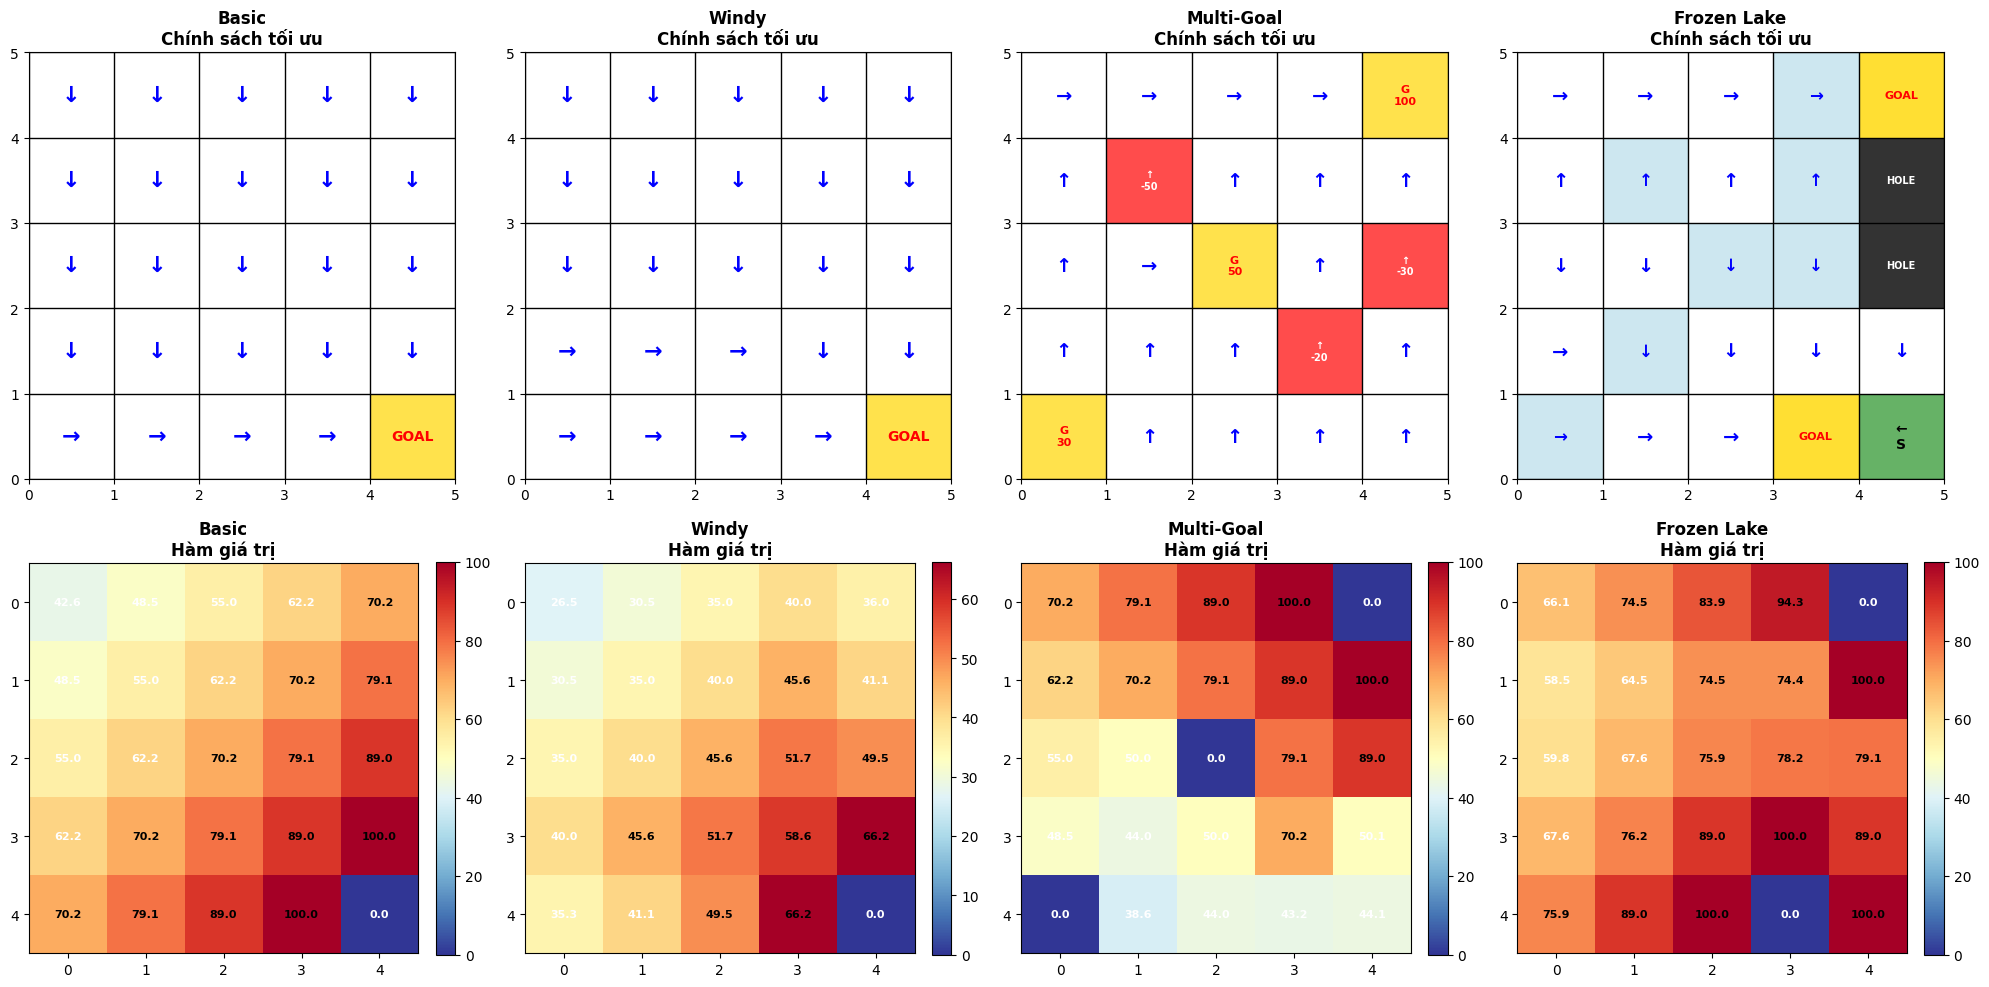


=== SO SÁNH HIỆU SUẤT ===
Bài tập			Value Iteration	Policy Iteration
-------------------------------------------------------
Basic Gridworld     	9         	N/A
Windy Gridworld     	67        	N/A
Multi-Goal          	8         	N/A
Frozen Lake         	24        	N/A

=== NHẬN XÉT ===
1. Value Iteration thường cần nhiều vòng lặp hơn Policy Iteration
2. Tuy nhiên, mỗi vòng lặp của Value Iteration đơn giản và nhanh hơn
3. Cả hai thuật toán đều cho kết quả chính sách tối ưu giống nhau
4. Value Iteration phù hợp khi cần triển khai đơn giản
5. Policy Iteration phù hợp khi cần hội tụ nhanh với ít vòng lặp


In [10]:
# Trực quan hóa và so sánh kết quả của Value Iteration
import matplotlib.pyplot as plt

def visualize_value_iteration_results():
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    direction_names = {0: "↑", 1: "↓", 2: "←", 3: "→"}
    
    # Danh sách các bài tập
    experiments = [
        ("Basic", optimal_policy, optimal_V, vi_basic.goal_state),
        ("Windy", windy_policy, windy_V, windy_vi.goal_state),
        ("Multi-Goal", multi_policy, multi_V, None),
        ("Frozen Lake", frozen_policy, frozen_V, None)
    ]
    
    for idx, (name, policy, values, goal) in enumerate(experiments):
        # Vẽ policy
        ax1 = axes[0, idx]
        ax1.set_title(f'{name}\nChính sách tối ưu', fontsize=12, fontweight='bold')
        
        # Vẽ grid
        for i in range(6):
            ax1.axhline(i, color='black', linewidth=1)
            ax1.axvline(i, color='black', linewidth=1)
        
        # Vẽ policy
        for row in range(5):
            for col in range(5):
                state = (row, col)
                
                if name == "Multi-Goal":
                    if state in multi_vi.terminal_states:
                        reward = multi_vi.rewards[state]
                        ax1.add_patch(plt.Rectangle((col, 5-row-1), 1, 1, 
                                                  facecolor='gold', alpha=0.7))
                        ax1.text(col + 0.5, 5 - row - 0.5, f"G\n{reward}", 
                                ha='center', va='center', fontsize=8, fontweight='bold', color='red')
                    elif state in multi_vi.rewards and multi_vi.rewards[state] < 0:
                        ax1.add_patch(plt.Rectangle((col, 5-row-1), 1, 1, 
                                                  facecolor='red', alpha=0.7))
                        action = int(policy[row, col])
                        arrow = direction_names[action]
                        ax1.text(col + 0.5, 5 - row - 0.5, f"{arrow}\n{multi_vi.rewards[state]}", 
                                ha='center', va='center', fontsize=7, fontweight='bold', color='white')
                    else:
                        action = int(policy[row, col])
                        arrow = direction_names[action]
                        ax1.text(col + 0.5, 5 - row - 0.5, arrow, 
                                ha='center', va='center', fontsize=14, fontweight='bold', color='blue')
                        
                elif name == "Frozen Lake":
                    if state in frozen_vi.goals:
                        ax1.add_patch(plt.Rectangle((col, 5-row-1), 1, 1, 
                                                  facecolor='gold', alpha=0.8))
                        ax1.text(col + 0.5, 5 - row - 0.5, "GOAL", 
                                ha='center', va='center', fontsize=8, fontweight='bold', color='red')
                    elif state in frozen_vi.holes:
                        ax1.add_patch(plt.Rectangle((col, 5-row-1), 1, 1, 
                                                  facecolor='black', alpha=0.8))
                        ax1.text(col + 0.5, 5 - row - 0.5, "HOLE", 
                                ha='center', va='center', fontsize=7, fontweight='bold', color='white')
                    elif state in frozen_vi.slippery_ice:
                        ax1.add_patch(plt.Rectangle((col, 5-row-1), 1, 1, 
                                                  facecolor='lightblue', alpha=0.6))
                        action = int(policy[row, col])
                        arrow = direction_names[action]
                        ax1.text(col + 0.5, 5 - row - 0.5, f"{arrow}", 
                                ha='center', va='center', fontsize=12, fontweight='bold', color='blue')
                    elif state == frozen_vi.start:
                        ax1.add_patch(plt.Rectangle((col, 5-row-1), 1, 1, 
                                                  facecolor='green', alpha=0.6))
                        action = int(policy[row, col])
                        arrow = direction_names[action]
                        ax1.text(col + 0.5, 5 - row - 0.5, f"{arrow}\nS", 
                                ha='center', va='center', fontsize=10, fontweight='bold', color='black')
                    else:
                        action = int(policy[row, col])
                        arrow = direction_names[action]
                        ax1.text(col + 0.5, 5 - row - 0.5, arrow, 
                                ha='center', va='center', fontsize=14, fontweight='bold', color='blue')
                        
                elif goal and state == goal:
                    ax1.add_patch(plt.Rectangle((col, 5-row-1), 1, 1, 
                                              facecolor='gold', alpha=0.7))
                    ax1.text(col + 0.5, 5 - row - 0.5, "GOAL", 
                            ha='center', va='center', fontsize=10, fontweight='bold', color='red')
                else:
                    action = int(policy[row, col])
                    arrow = direction_names[action]
                    ax1.text(col + 0.5, 5 - row - 0.5, arrow, 
                            ha='center', va='center', fontsize=16, fontweight='bold', color='blue')
        
        ax1.set_xlim(0, 5)
        ax1.set_ylim(0, 5)
        ax1.set_aspect('equal')
        
        # Vẽ value function
        ax2 = axes[1, idx]
        im = ax2.imshow(values, cmap='RdYlBu_r')
        ax2.set_title(f'{name}\nHàm giá trị', fontsize=12, fontweight='bold')
        
        for row in range(5):
            for col in range(5):
                color = 'white' if values[row, col] < np.mean(values) else 'black'
                ax2.text(col, row, f'{values[row, col]:.1f}',
                        ha="center", va="center", color=color, fontweight='bold', fontsize=8)
        
        plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
    
    plt.tight_layout()
    plt.show()

# Đảm bảo tất cả các biến đã được định nghĩa trước khi gọi hàm visualization
print("\n=== KIỂM TRA VÀ ĐỊNH NGHĨA LẠI CÁC BIẾN ===")

# Kiểm tra và chạy lại nếu cần thiết
try:
    print(f"Basic VI: {len(optimal_policy)} x {len(optimal_policy[0])}")
    print(f"Windy VI: {len(windy_policy)} x {len(windy_policy[0])}")
    print(f"Multi VI: {len(multi_policy)} x {len(multi_policy[0])}")
    print(f"Frozen VI: {len(frozen_policy)} x {len(frozen_policy[0])}")
    print("Tất cả biến đã được định nghĩa đúng!")
except NameError as e:
    print(f"Lỗi biến chưa định nghĩa: {e}")
    print("Chạy lại từng bài tập...")
    
    # Chạy lại Basic nếu cần
    if 'optimal_policy' not in locals():
        vi_basic = ValueIteration()
        optimal_V, iterations = vi_basic.value_iteration()
        optimal_policy = vi_basic.extract_policy()
        print("✓ Đã chạy lại Basic Value Iteration")
    
    # Chạy lại Windy nếu cần
    if 'windy_policy' not in locals():
        windy_vi = WindyValueIteration()
        windy_V, windy_iterations = windy_vi.value_iteration()
        windy_policy = windy_vi.extract_policy()
        print("✓ Đã chạy lại Windy Value Iteration")
    
    # Chạy lại Multi-Goal nếu cần
    if 'multi_policy' not in locals():
        multi_vi = MultiGoalValueIteration()
        multi_V, multi_iterations = multi_vi.value_iteration()
        multi_policy = multi_vi.extract_policy()
        print("✓ Đã chạy lại Multi-Goal Value Iteration")
    
    # Chạy lại Frozen Lake nếu cần
    if 'frozen_policy' not in locals():
        frozen_vi = FrozenLakeValueIteration()
        frozen_V, frozen_iterations = frozen_vi.value_iteration()
        frozen_policy = frozen_vi.extract_policy()
        print("✓ Đã chạy lại Frozen Lake Value Iteration")

print("\n=== TRỰC QUAN HÓA KẾT QUẢ VALUE ITERATION ===")
visualize_value_iteration_results()

# So sánh hiệu suất
print("\n=== SO SÁNH HIỆU SUẤT ===")
comparison_data = [
    ("Basic Gridworld", iterations, "N/A"),
    ("Windy Gridworld", windy_iterations, "N/A"), 
    ("Multi-Goal", multi_iterations, "N/A"),
    ("Frozen Lake", frozen_iterations, "N/A")
]

print("Bài tập\t\t\tValue Iteration\tPolicy Iteration")
print("-" * 55)
for name, vi_iter, pi_iter in comparison_data:
    print(f"{name:<20}\t{vi_iter:<10}\t{pi_iter}")

print(f"\n=== NHẬN XÉT ===")
print("1. Value Iteration thường cần nhiều vòng lặp hơn Policy Iteration")
print("2. Tuy nhiên, mỗi vòng lặp của Value Iteration đơn giản và nhanh hơn")
print("3. Cả hai thuật toán đều cho kết quả chính sách tối ưu giống nhau")
print("4. Value Iteration phù hợp khi cần triển khai đơn giản")
print("5. Policy Iteration phù hợp khi cần hội tụ nhanh với ít vòng lặp")